## MVP - Análise de Dados e Boas Práticas
Este projeto corresponde ao MVP da segunda sprint do curso de Pós-Graduação em Ciência de Dados e Analytics da PUC-RJ.

**Aluna: Maria Vitória Barbosa Valladares**



# 1. Definição do Problema

---

O problema consiste em analisar dados das viagens do Uber para identificar padrões, tendências ou insights que possam melhorar a eficiência das viagens, compreender o comportamento dos usuários ou otimizar a operação em áreas específicas.
A análise se concentra em segmentar usuários com base em seus padrões de viagem sem rótulos predefinidos, sendo um problema não supervisionado.
Todos os dados utilizados são provenientes do consumo da própria autora do projeto que consente a liberação dessas informações, disponibilidados pela Uber.

### Premissas sobre o Problema
1.   Viagens mais longas podem ter uma correlação com um valor de tarifa mais alto;
2.   A duração da viagem dependendo do tráfego na cidade naquele momento;
3.   A velocidade média das viagens depende do horário/tráfego no momento.

### Perguntas para responder
1. Como a distância percorrida influencia no valor da tarifa e na duração da viagem?
2. Qual foi o total de viagens completadas nos anos anteriores?
3. Quais foram os valores máximos, mínimos e médios da tarifa, distância percorrida e duração da viagem?
4. Qual foi o montante total das tarifas cobradas por mês e por ano?
5. Quantas viagens foram realizadas por ano, divididas pelos dias da semana?
6. Qual foi a velocidade média das viagens realizadas?

### Atributos do Dataset

Atributos | Definição
--- | :---:
`Cidade` | Nome da cidade onde a viagem ocorreu.
`Tipo de Produto` | Categoria ou tipo específico de serviço oferecido pela Uber, como UberX, Uber Black, Uber Pool, etc.
`Status da Viagem ou Pedido` | Indicação do estado atual da viagem ou do pedido, como "Solicitado", "Em andamento" ou "Concluído".
`Tempo de Solicitação` | Momento em que o usuário fez a solicitação da viagem.
`Hora de Início da Viagem` | Horário em que a viagem começou.
`Início da Viagem Lat./Long.` | Coordenadas de latitude e longitude do ponto de partida da viagem.
`Endereço Inicial da Viagem` | Localização inicial (endereço) de onde a viagem foi solicitada.
`Horário de Entrega` | Horário em que a viagem foi finalizada ou entregue.
`Lat. de Desembarque` | Coordenadas de latitude e longitude do ponto de desembarque ou destino da viagem.
`Entrega de GNL` | Possível indicação se a entrega foi feita através de algum serviço específico chamado GNL.
`Endereço de Entrega` | Localização de destino da viagem (endereço).
`Distância (milhas)` | Distância percorrida durante a viagem, frequentemente medida em milhas.
`Valor da Tarifa` | Montante cobrado ao usuário pela viagem.
`Moeda Tarifária` | A moeda na qual a tarifa foi cobrada (por exemplo, dólar, euro, etc.).




# 2. Estatísticas descritivas
Para iniciar, vamos explorar o dataset "trips_data", investigando suas dimensões, informações e examinando amostras de linhas. Esta análise proporcionará uma compreensão detalhada das propriedades centrais do conjunto de dados, incluindo medidas como médias, medianas, desvios padrão, distribuições e possíveis valores discrepantes. Essa abordagem possibilita a identificação de padrões, tendências e anomalias, oferecendo insights preliminares sobre a estrutura e natureza dos dados. O conjunto de dados contém 15 atributos e 392 instâncias, representando informações de viagens solicitadas ao longo de 4 anos de utilização do aplicativo Uber.

In [1]:
# Imports de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pandas as pd
pd.options.mode.chained_assignment = None


from datetime import datetime
from datetime import timedelta
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
#Importe de arquivo trips_data.csv
#Clique no botão 'Escolher arquivo' e selecione o trips_data.csv disponibilizao no github
uploaded = files.upload()

uber_df = pd.read_csv(io.BytesIO(uploaded['trips_data.csv']))
uber_df.head()

# Informações sobre viagens de dataframe: tipo de índice e colunas, valores não nulos e uso de memória.
uber_df.info()

Saving trips_data.csv to trips_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  392 non-null    object 
 1   Product Type          357 non-null    object 
 2   Trip or Order Status  392 non-null    object 
 3   Request Time          392 non-null    object 
 4   Begin Trip Time       392 non-null    object 
 5   Begin Trip Lat        356 non-null    float64
 6   Begin Trip Lng        356 non-null    float64
 7   Begin Trip Address    354 non-null    object 
 8   Dropoff Time          392 non-null    object 
 9   Dropoff Lat           356 non-null    float64
 10  Dropoff Lng           356 non-null    float64
 11  Dropoff Address       356 non-null    object 
 12  Distance (miles)      385 non-null    float64
 13  Fare Amount           385 non-null    float64
 14  Fare Currency         385 non-null

In [3]:
# Análise Exploraória do Dataset

# 1. Quantos atributos e instâncias existem?
num_atributos = len(uber_df.columns)
num_instancias = len(uber_df)
print(f"1. Quantidade de Atributos: {num_atributos}")
print(f"   Quantidade de Instâncias: {num_instancias}")

# 2. Quais são os tipos de dados dos atributos?
tipos_de_dados = uber_df.dtypes
print("\n2. Tipos de Dados dos Atributos:")
print(tipos_de_dados)

1. Quantidade de Atributos: 15
   Quantidade de Instâncias: 392

2. Tipos de Dados dos Atributos:
City                     object
Product Type             object
Trip or Order Status     object
Request Time             object
Begin Trip Time          object
Begin Trip Lat          float64
Begin Trip Lng          float64
Begin Trip Address       object
Dropoff Time             object
Dropoff Lat             float64
Dropoff Lng             float64
Dropoff Address          object
Distance (miles)        float64
Fare Amount             float64
Fare Currency            object
dtype: object


In [4]:
# 3. Quais são  primeiras linhas do dataset?
primeiras_linhas = uber_df.head()
print("\n3. Primeiras Linhas do Dataset:")
print(primeiras_linhas)


3. Primeiras Linhas do Dataset:
             City Product Type Trip or Order Status  \
0  Rio de Janeiro          NaN            COMPLETED   
1  Rio de Janeiro          NaN            COMPLETED   
2  Rio de Janeiro          NaN            COMPLETED   
3  Rio de Janeiro          NaN            COMPLETED   
4  Rio de Janeiro          NaN            COMPLETED   

                    Request Time                Begin Trip Time  \
0  2023-10-25 15:55:58 +0000 UTC  2023-10-25 16:02:20 +0000 UTC   
1  2023-10-25 14:18:46 +0000 UTC  2023-10-25 14:20:30 +0000 UTC   
2  2023-10-24 19:42:48 +0000 UTC  2023-10-24 19:50:31 +0000 UTC   
3  2023-10-24 18:27:05 +0000 UTC  2023-10-24 18:37:56 +0000 UTC   
4  2023-10-14 22:02:14 +0000 UTC  2023-10-14 22:15:28 +0000 UTC   

   Begin Trip Lat  Begin Trip Lng  \
0      -22.972450      -43.187940   
1      -22.964680      -43.174560   
2      -22.945160      -43.182434   
3      -22.964485      -43.174065   
4      -22.936653      -43.194300   

          

In [5]:
# 4. Há valores faltantes, discrepantes ou inconsistentes?
valores_faltantes = uber_df.isnull().sum()
valores_discrepantes = uber_df.describe().loc[['min', 'max']].T
print("\n4.Valores faltantes, discrepantes ou inconsistentes")
print("\na. Valores Faltantes:")
print(valores_faltantes)
print("\nb. Valores Discrepantes (mínimo e máximo):")
print(valores_discrepantes)


4.Valores faltantes, discrepantes ou inconsistentes

a. Valores Faltantes:
City                     0
Product Type            35
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Begin Trip Lat          36
Begin Trip Lng          36
Begin Trip Address      38
Dropoff Time             0
Dropoff Lat             36
Dropoff Lng             36
Dropoff Address         36
Distance (miles)         7
Fare Amount              7
Fare Currency            7
dtype: int64

b. Valores Discrepantes (mínimo e máximo):
                        min        max
Begin Trip Lat   -23.624666  -5.054721
Begin Trip Lng   -46.680264 -42.746918
Dropoff Lat      -23.648092  -5.054733
Dropoff Lng      -46.685783 -42.761898
Distance (miles)   0.000000  10.220000
Fare Amount        0.000000  74.900000


In [6]:
# 5. Resumo estatístico dos atributos com valor numérico
resumo_estatistico = uber_df.describe(include='number')
print("\n5. Resumo Estatístico dos Atributos Numéricos:")
print(resumo_estatistico)


5. Resumo Estatístico dos Atributos Numéricos:
       Begin Trip Lat  Begin Trip Lng  Dropoff Lat  Dropoff Lng  \
count      356.000000      356.000000   356.000000   356.000000   
mean       -20.022878      -43.263565   -20.024190   -43.264945   
std          6.657385        0.724574     6.654174     0.723975   
min        -23.624666      -46.680264   -23.648092   -46.685783   
25%        -22.964752      -43.182801   -22.964613   -43.182488   
50%        -22.961202      -43.176322   -22.955193   -43.176320   
75%        -22.942418      -43.174087   -22.944306   -43.173890   
max         -5.054721      -42.746918    -5.054733   -42.761898   

       Distance (miles)  Fare Amount  
count        385.000000   385.000000  
mean           2.322104    12.901455  
std            2.030021     9.435535  
min            0.000000     0.000000  
25%            1.000000     8.950000  
50%            1.960000    11.920000  
75%            3.290000    16.990000  
max           10.220000    74.900000

# 3. Tratamento dos Dados
Com base nos insights obtidos no tópico anterior, esta etapa visa corrigir inconsistências, preencher lacunas, remover dados duplicados ou errôneos e aplicar transformações para tornar os dados mais consistentes e confiáveis. Isso proporciona uma base sólida para análises subsequentes, modelagem estatística ou aplicação de algoritmos de aprendizado de máquina.

In [7]:
# Renomeando Colunas
uber_df.rename(columns={'City': 'city', 'Product Type': 'product_type', 'Trip or Order Status': 'status',
                      'Request Time': 'request_time', 'Begin Trip Time': 'begin_time', 'Begin Trip Lat': 'begin_lat',
                     'Begin Trip Lng': 'begin_long', 'Dropoff Time': 'dropoff_time', 'Dropoff Lat': 'dropoff_lat',
                      'Dropoff Lng': 'dropoff_long', 'Distance (miles)': 'distance_km','Fare Amount':'fare_amount'}, inplace=True)

In [8]:
# Remover linhas onde o status é 'CANCELED'
uber_df = uber_df[uber_df['status'] == 'COMPLETED']

#Removendo linhas de um DataFrame do pandas em que o valor na coluna 'product_type' seja nulo ou NaN (valores ausentes)
uber_df.dropna(subset = ['product_type'], inplace=True)
uber_df[uber_df.begin_lat.isnull()]

uber_df

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency
8,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:53:24 +0000 UTC,2023-10-05 21:55:25 +0000 UTC,-22.972550,-43.187940,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,2023-10-05 22:13:06 +0000 UTC,-22.964590,-43.174640,"Avenida Prado Júnior, 48 - Copacabana - Rio de...",1.06,9.92,BRL
9,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:05:05 +0000 UTC,2023-10-05 21:16:36 +0000 UTC,-22.964490,-43.179670,"Rua Barata Ribeiro, 194 - Copacabana - Rio de ...",2023-10-05 21:29:54 +0000 UTC,-22.973690,-43.188700,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,1.08,12.29,BRL
10,Rio de Janeiro,UberX,COMPLETED,2023-10-05 01:17:18 +0000 UTC,2023-10-05 01:24:17 +0000 UTC,-22.947813,-43.183422,R. Prof. Alfredo Gomes - Botafogo - Rio de Jan...,2023-10-05 01:39:14 +0000 UTC,-22.963785,-43.172140,"Rua Gustavo Sampaio, 732 - Leme - Rio de Janei...",2.74,16.92,BRL
11,Rio de Janeiro,UberX,COMPLETED,2023-10-04 20:52:06 +0000 UTC,2023-10-04 20:56:57 +0000 UTC,-22.964565,-43.174004,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2023-10-04 21:12:05 +0000 UTC,-22.947659,-43.182537,"Praia de Botafogo, 400 - Botafogo - Rio de Jan...",2.44,13.93,BRL
12,Rio de Janeiro,UberX,COMPLETED,2023-09-10 02:33:29 +0000 UTC,2023-09-10 02:35:49 +0000 UTC,-22.913185,-43.181854,"R. Do Lavradio, 82 - Centro - Rio de Janeiro -...",2023-09-10 02:49:22 +0000 UTC,-22.964418,-43.173977,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",5.01,19.98,BRL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Teresina,UberX,COMPLETED,2020-03-13 23:14:06 +0000 UTC,2020-03-13 23:17:39 +0000 UTC,-5.136976,-42.807575,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-13 23:36:42 +0000 UTC,-5.100644,-42.789122,"Av. Abdias Neves, 1649 - Cristo Rei, Teresina ...",4.33,21.19,BRL
388,Teresina,UberX,COMPLETED,2020-03-10 10:40:38 +0000 UTC,2020-03-10 10:48:15 +0000 UTC,-5.137026,-42.807562,"R. Seis, 356 - Saci, Teresina - PI, 64020-460,...",2020-03-10 11:04:40 +0000 UTC,-5.105740,-42.764202,"Conj. Dirceu Arcoverde II Qu 159, 9 - Parque I...",4.58,15.49,BRL
389,Teresina,UberX,COMPLETED,2020-03-07 11:39:23 +0000 UTC,2020-03-07 11:45:36 +0000 UTC,-5.137006,-42.807589,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-07 12:01:28 +0000 UTC,-5.105634,-42.763874,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",4.52,13.54,BRL
390,Teresina,UberX,COMPLETED,2020-03-05 11:14:40 +0000 UTC,2020-03-05 11:21:08 +0000 UTC,-5.122359,-42.801298,"Av. Barão de Gurguéia, 3119 - Tabuleta, Teresi...",2020-03-05 11:31:11 +0000 UTC,-5.105513,-42.764078,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",3.17,10.66,BRL


In [9]:
# Realização da conversão de milas para kilometros
uber_df['distance_km'] = uber_df['distance_km']*1.60934
uber_df.distance_km

8       1.705900
9       1.738087
10      4.409592
11      3.926790
12      8.062793
         ...    
387     6.968442
388     7.370777
389     7.274217
390     5.101608
391    12.440198
Name: distance_km, Length: 318, dtype: float64

In [10]:
# Obtendo o ano, mês, dia da semana e hora da data da solicitação
def date_conversion(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
        df[col] = pd.to_datetime(df[col])
        df[f'year'] = df[col].dt.year
        df[f'month'] = df[col].dt.strftime("%b")
        df[f'weekday'] = df[col].dt.strftime("%a")
        df[f'hour'] = df[col].dt.hour  # Adicionando a coluna de hora
    return df

# Supondo que 'uber_df' seja o seu DataFrame
columns_to_convert = ['request_time', 'begin_time', 'dropoff_time']
uber_df = date_conversion(uber_df, columns_to_convert)


In [11]:
# Filtrando linhas em que a data na coluna 'begin_time' é diferente da data na coluna 'dropoff_time'.
uber_df.loc[uber_df['begin_time'].dt.date != uber_df['dropoff_time'].dt.date]

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency,year,month,weekday,hour
210,Rio de Janeiro,UberX,COMPLETED,2022-12-11 23:32:04,2022-12-11 23:42:30,-22.986515,-43.207096,Av. Vieira Souto - Ipanema - Rio de Janeiro - ...,2022-12-12 00:04:38,-22.964396,-43.173880,"Avenida Princesa Isabel, 7, B - Rio de Janeiro...",5.359102,14.93,BRL,2022,Dec,Mon,0
255,Rio de Janeiro,UberX,COMPLETED,2022-10-04 23:54:06,2022-10-04 23:56:34,-22.964450,-43.173990,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2022-10-05 00:14:37,-22.899038,-43.209656,"Av. Francisco Bicalho, 1 - Santo Cristo, Rio d...",10.830858,26.91,BRL,2022,Oct,Wed,0
391,Teresina,UberX,COMPLETED,2020-03-02 23:43:53,2020-03-02 23:47:45,-5.072298,-42.751578,"R. Farmacêutico João Carvalho, 5517 - Santa Is...",2020-03-03 00:11:45,-5.136999,-42.807558,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",12.440198,19.51,BRL,2020,Mar,Tue,0


In [12]:
# Obtendo a duração da viagem (minutos)
uber_df['trip_duration'] = (uber_df['dropoff_time'] - uber_df['begin_time']).dt.total_seconds()/60
uber_df

,city,product_type,status,request_time,begin_time,begin_lat,begin_long,Begin Trip Address,dropoff_time,dropoff_lat,dropoff_long,Dropoff Address,distance_km,fare_amount,Fare Currency,year,month,weekday,hour,trip_duration
8,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:53:24,2023-10-05 21:55:25,-22.972550,-43.187940,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,2023-10-05 22:13:06,-22.964590,-43.174640,"Avenida Prado Júnior, 48 - Copacabana - Rio de...",1.705900,9.92,BRL,2023,Oct,Thu,22,17.683333
9,Rio de Janeiro,UberX,COMPLETED,2023-10-05 21:05:05,2023-10-05 21:16:36,-22.964490,-43.179670,"Rua Barata Ribeiro, 194 - Copacabana - Rio de ...",2023-10-05 21:29:54,-22.973690,-43.188700,Av. Nossa Sra de Copacabana 1º - 2º e 3º Pavim...,1.738087,12.29,BRL,2023,Oct,Thu,21,13.300000
10,Rio de Janeiro,UberX,COMPLETED,2023-10-05 01:17:18,2023-10-05 01:24:17,-22.947813,-43.183422,R. Prof. Alfredo Gomes - Botafogo - Rio de Jan...,2023-10-05 01:39:14,-22.963785,-43.172140,"Rua Gustavo Sampaio, 732 - Leme - Rio de Janei...",4.409592,16.92,BRL,2023,Oct,Thu,1,14.950000
11,Rio de Janeiro,UberX,COMPLETED,2023-10-04 20:52:06,2023-10-04 20:56:57,-22.964565,-43.174004,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",2023-10-04 21:12:05,-22.947659,-43.182537,"Praia de Botafogo, 400 - Botafogo - Rio de Jan...",3.926790,13.93,BRL,2023,Oct,Wed,21,15.133333
12,Rio de Janeiro,UberX,COMPLETED,2023-09-10 02:33:29,2023-09-10 02:35:49,-22.913185,-43.181854,"R. Do Lavradio, 82 - Centro - Rio de Janeiro -...",2023-09-10 02:49:22,-22.964418,-43.173977,"Avenida Princesa Isabel, 7 - Rio de Janeiro - ...",8.062793,19.98,BRL,2023,Sep,Sun,2,13.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Teresina,UberX,COMPLETED,2020-03-13 23:14:06,2020-03-13 23:17:39,-5.136976,-42.807575,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-13 23:36:42,-5.100644,-42.789122,"Av. Abdias Neves, 1649 - Cristo Rei, Teresina ...",6.968442,21.19,BRL,2020,Mar,Fri,23,19.050000
388,Teresina,UberX,COMPLETED,2020-03-10 10:40:38,2020-03-10 10:48:15,-5.137026,-42.807562,"R. Seis, 356 - Saci, Teresina - PI, 64020-460,...",2020-03-10 11:04:40,-5.105740,-42.764202,"Conj. Dirceu Arcoverde II Qu 159, 9 - Parque I...",7.370777,15.49,BRL,2020,Mar,Tue,11,16.416667
389,Teresina,UberX,COMPLETED,2020-03-07 11:39:23,2020-03-07 11:45:36,-5.137006,-42.807589,"R. Seis, 355 - Saci, Teresina - PI, 64020-460,...",2020-03-07 12:01:28,-5.105634,-42.763874,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",7.274217,13.54,BRL,2020,Mar,Sat,12,15.866667
390,Teresina,UberX,COMPLETED,2020-03-05 11:14:40,2020-03-05 11:21:08,-5.122359,-42.801298,"Av. Barão de Gurguéia, 3119 - Tabuleta, Teresi...",2020-03-05 11:31:11,-5.105513,-42.764078,"Conj. Dirceu Arcoverde I Qu 9, 13 - Parque Ide...",5.101608,10.66,BRL,2020,Mar,Thu,11,10.050000


# 4. Análise de dados & Visualizações

Com um dataset já tratado e confiável, nesta etapa serão respondidas as perguntas apresentadas na problemática, com o objetivo de identificar os padrões de viagem dos usuários.

In [13]:
#Série contendo contagens de valores únicos das cidades que ocorreram corridas
print('\nContagens de valores únicos das cidades que ocorreram corridas:')
contagem_cidades = uber_df.city.value_counts()
print(contagem_cidades)

# Série contendo contagens de valores exclusivos de tipos de produtos.
print('\nContagens de valores exclusivos de tipos de produtos:')
contagem_produtos = uber_df.product_type.value_counts()
print(contagem_produtos)

# Frequência do status das viagens.
print('\nFrequência do status das viagens:')
contagem_viagens = uber_df.status.value_counts()
print(contagem_viagens)


Contagens de valores únicos das cidades que ocorreram corridas:
Rio de Janeiro    248
Teresina           56
Sao Paulo          14
Name: city, dtype: int64

Contagens de valores exclusivos de tipos de produtos:
UberX      314
Black        2
VIP          1
Comfort      1
Name: product_type, dtype: int64

Frequência do status das viagens:
COMPLETED    318
Name: status, dtype: int64


**1. Como a distância percorrida influencia no valor da tarifa?**

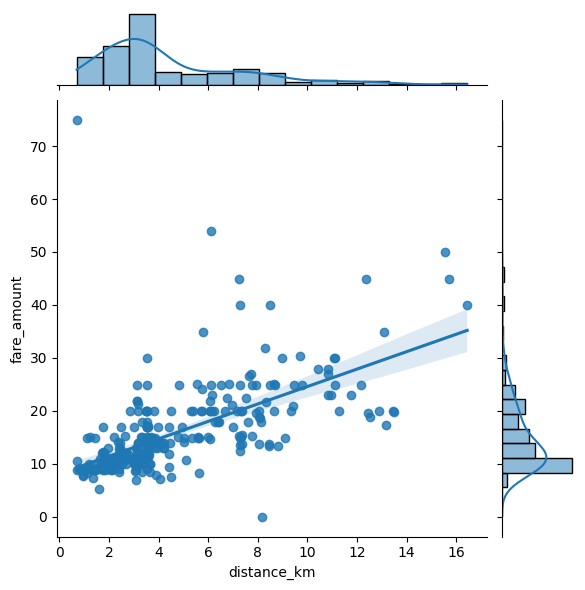

In [14]:
#Relação entre a distância percorrida e o valor da tarifa
#Gráfico de dispersão com os histogramas

sns.jointplot(
    x="distance_km",
    y='fare_amount',
    data=uber_df,
    kind='reg'
)
plt.show()


Com base no gráfico acima, pode-se perceber que, quanto maior a distância percorrida, maior será o custo da viagem. Além disso, os valores mais distantes da reta de regressão podem ser justificados pelo tipo específico de serviço, como UberX, Uber Black, Uber Comfort, etc. Por fim, com o histograma observa-se a distribuição de frequência dos dados concentrada nas viagens de baixo valor e menor distância.

**2.  Total de viagens completadas nos anos anteriores?**

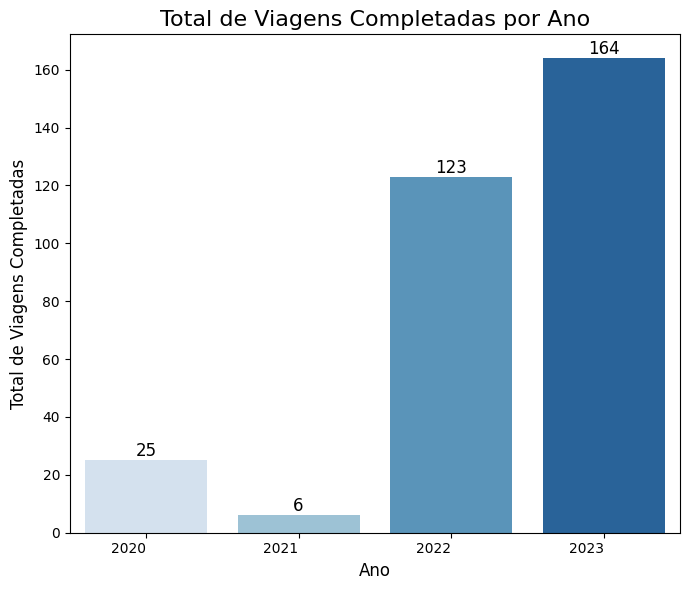

In [15]:
# Contagem de viagens durante dos anos

# Filtrando viagens completadas ('status' é 'completed')
completed_trips = uber_df
# Contando o número de viagens completadas por ano
completed_trips_by_year = completed_trips['year'].value_counts().sort_index()

# Criando o gráfico de barras
# Definindo uma paleta de cores azuis
palette = sns.color_palette("Blues", len(completed_trips_by_year))

# Criando o gráfico de barras com o Seaborn
plt.figure(figsize=(7, 6))
sns.barplot(x=completed_trips_by_year.index, y=completed_trips_by_year, palette="Blues")
plt.title('Total de Viagens Completadas por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Total de Viagens Completadas', fontsize=12)
plt.xticks( ha='right')  # Ajusta a rotação dos rótulos do eixo x
plt.yticks(fontsize=10)  # Tamanho da fonte no eixo y

# Adicionando rótulos nos retângulos do gráfico
for index, value in enumerate(completed_trips_by_year):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


De acordo com o gráfico, observa-se um baixo uso do aplicativo nos anos de 2020 e 2021, o que se justifica pelo período de lockdown causado pela Covid-19. O número de viagens cresce nos anos seguintes, chegando a mais de 150 viagens em 2023.

**3. Quais foram os valores máximos, mínimos e médios da tarifa, distância percorrida e duração da viagem?**

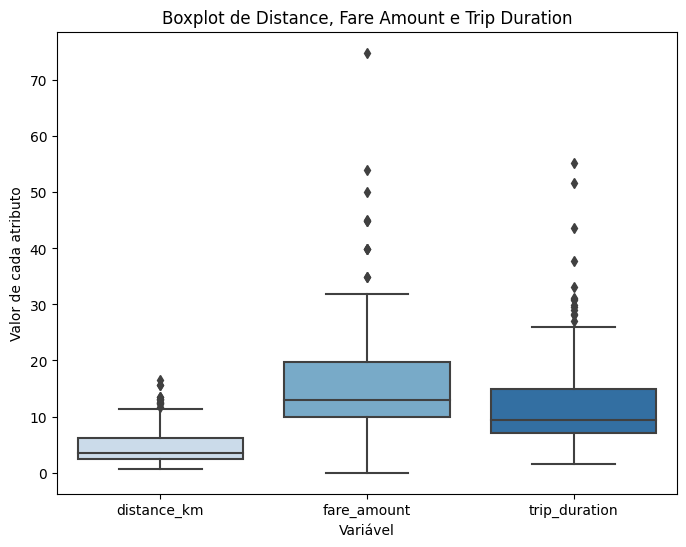

In [16]:
# Obervação das distribuição de valores

# Gráfico de boxplot para as colunas de interesse
plt.figure(figsize=(8, 6))
sns.boxplot(data=uber_df[['distance_km', 'fare_amount', 'trip_duration']], palette='Blues')
plt.title('Boxplot de Distance, Fare Amount e Trip Duration')
plt.ylabel('Valor de cada atributo')
plt.xlabel('Variável')
plt.show()

O gráfico gerado proporciona uma visão clara da variabilidade dos dados, apresentando a mediana e os quartis de cada atributo. Podemos observar que o usuário realiza, em sua maioria, viagens com distâncias inferiores a 5 km, com duração predominantemente em torno de 10 minutos e tarifas abaixo de 20 reais. Além disso, identificamos a presença de outliers, como valores de corrida (fare_amount) acima de 70 reais, viagens que ultrapassam os 30 minutos de duração e distâncias superiores a 10 km. Isso sugere que o usuário pode ter mais de um perfil de viagem, com ocorrência de deslocamentos incomuns ou atípicos em relação à maioria das viagens realizadas.

**4. Qual foi o montante total das tarifas cobradas por mês e por ano?**

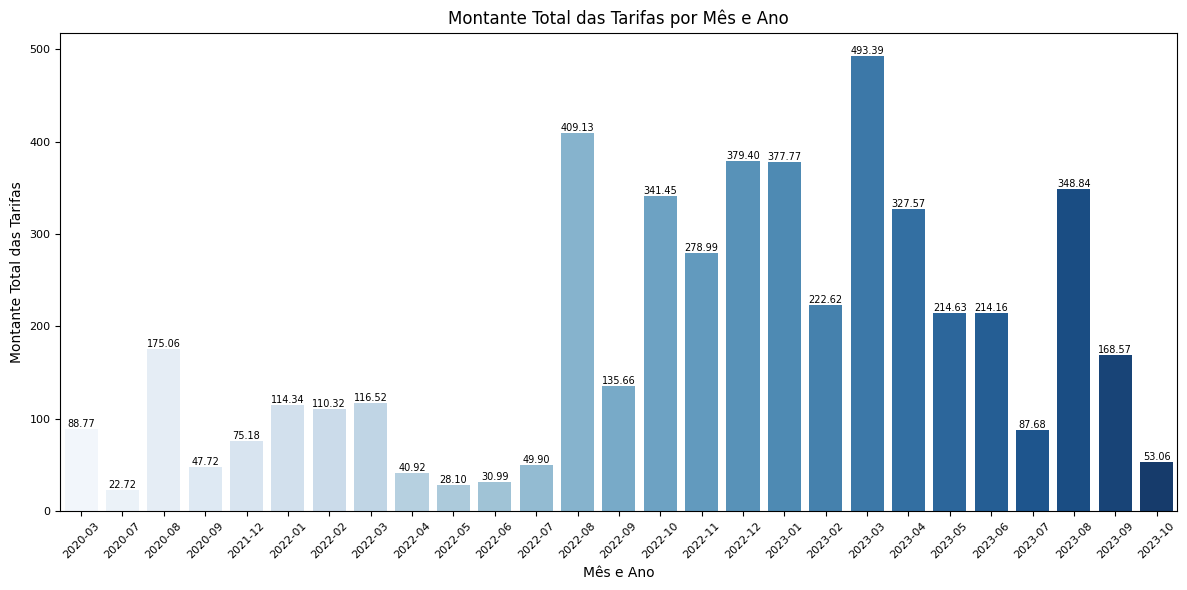

In [17]:
# Calculando o montante total das tarifas por mês e ano
total_tarifas_por_mes_ano = uber_df.groupby(['year', 'month'])['fare_amount'].sum().reset_index()

# Ordenando os valores corretamente por ano e mês
total_tarifas_por_mes_ano['date'] = pd.to_datetime(total_tarifas_por_mes_ano['year'].astype(str) + '-' + total_tarifas_por_mes_ano['month'], format='%Y-%b')
total_tarifas_por_mes_ano = total_tarifas_por_mes_ano.sort_values('date')

# Formatar a coluna 'date' para exibir no formato 'ano-mês' (por exemplo, "2023-01")
total_tarifas_por_mes_ano['date'] = total_tarifas_por_mes_ano['date'].dt.strftime('%Y-%m')

# Criando o gráfico de barras com Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='date', y='fare_amount', data=total_tarifas_por_mes_ano, palette="Blues")
plt.title('Montante Total das Tarifas por Mês e Ano')
plt.xlabel('Mês e Ano')
plt.ylabel('Montante Total das Tarifas')
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

# Adicionando rótulos nos retângulos do gráfico
for index, p in enumerate(plt.gca().patches):
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{total_tarifas_por_mes_ano.iloc[index]["fare_amount"]:.2f}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()



Com base no montante ao longo dos meses, observa-se um maior gasto em junho de 2023, com quase 500 reais gastos em corridas.

**5. Quantas viagens foram realizadas por ano, divididas pelos dias da semana?**

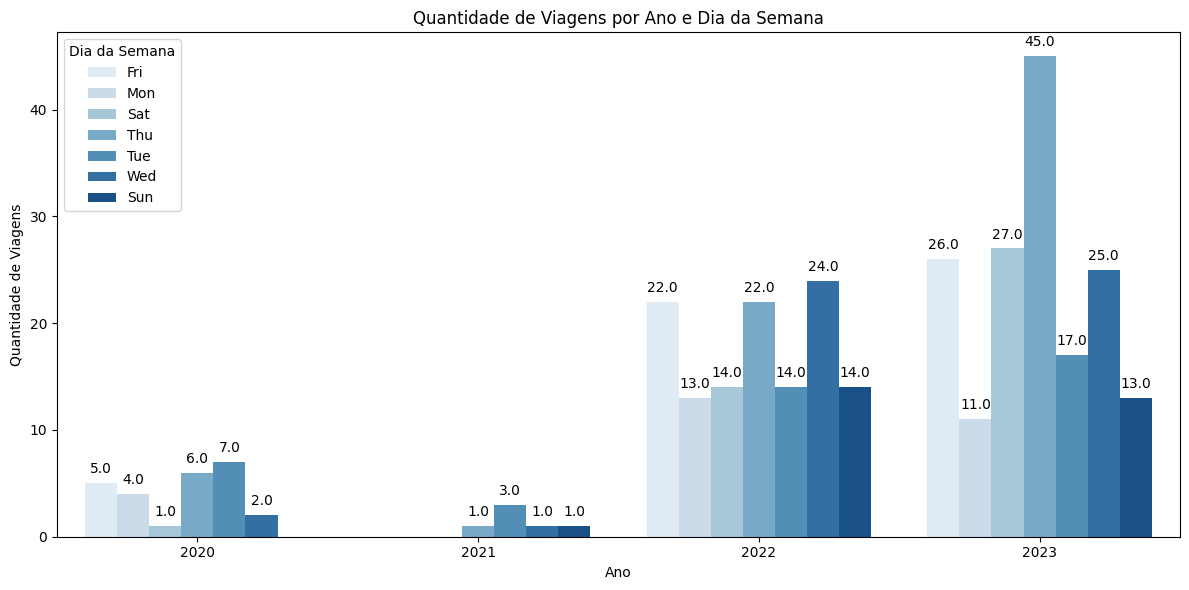

In [18]:
# Observação das viagens por dia da semana

viagens_por_ano_dia_semana = uber_df.groupby(['year', 'weekday']).size().reset_index(name='count')

# Criando o gráfico de barras para as viagens por ano e dia da semana
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=viagens_por_ano_dia_semana, x='year', y='count', hue='weekday', palette="Blues")
plt.title('Quantidade de Viagens por Ano e Dia da Semana')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Viagens')
plt.legend(title='Dia da Semana', loc='upper left')

# Adicionando rótulos nos retângulos do gráfico
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


A partir do gráfico acima, observa-se uma variação semanal em relação aos dias de maior uso do aplicativo. No ano de 2023, nota-se que o maior número de viagens ocorreu na quinta-feira (Thursday).

**6. Qual foi a velocidade média das viagens realizadas?**

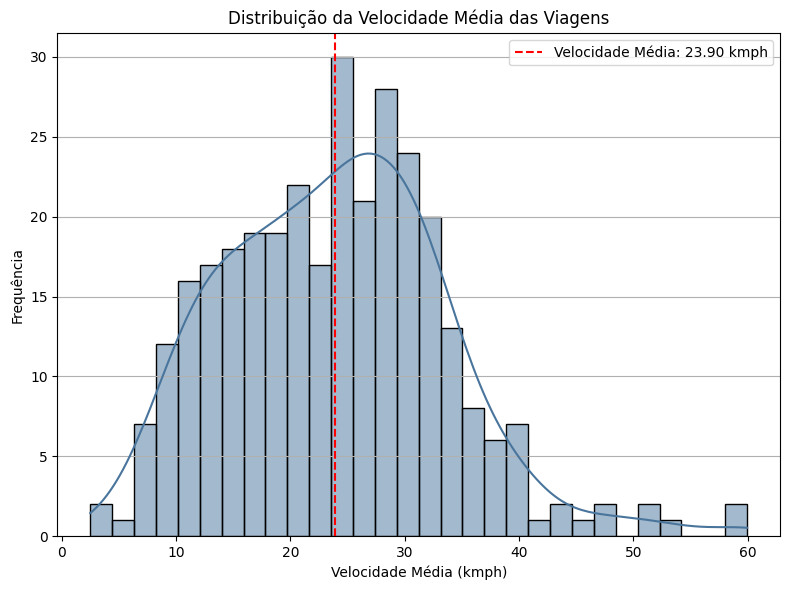

In [19]:
# Calculando a velocidade média das viagens (distância em km e duração em horas)
uber_speed = uber_df['distance_km'] / (uber_df['trip_duration'] / 60)

# Calculando a velocidade média total de todas as viagens
velocidade_media_total = uber_speed.mean()

# Criando o gráfico para a velocidade média das viagens com Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(uber_speed, bins=30, kde=True, color="#49759c")
plt.axvline(velocidade_media_total, color='red', linestyle='dashed', linewidth=1.5, label=f'Velocidade Média: {velocidade_media_total:.2f} kmph')
plt.title('Distribuição da Velocidade Média das Viagens')
plt.xlabel('Velocidade Média (kmph)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


A distribuição da Velocidade Média das Viagens nos traz informações importantes sobre a relação entre a distância percorrida e o tempo de duração da viagem, oferecendo insights sobre o comportamento desses deslocamentos. Observa-se uma distribuição mais expressiva da velocidade média entre 20 e 30 km/h, indicando uma velocidade média estável e consistente, o que sugere a ocorrência de viagens mais curtas e rápidas.

# 5. Clusterização
A clusterização é uma técnica de aprendizado não supervisionado que agrupa dados semelhantes em conjuntos, chamados de clusters. No contexto deste projeto, utilizaremos a técnica de clusterização para segmentar os perfis de clientes com base nos dados obtidos na análise. Pressupõe-se encontrar três principais perfis de viagens: o primeiro, caracterizado por viagens curtas e de baixo custo; o segundo, com variação significativa nos preços, apesar da curta distância percorrida; e o terceiro, representando viagens com distâncias mais longas.

Com base na coleta, limpeza e análise exploratória já realizada nos dados, realizaremos as seguintes etapas:

1. **Seleção de características (features)**: Escolha as características mais relevantes para a análise de clusterização.
2. **Normalização ou padronizaçã**o: Em alguns casos, é necessário normalizar ou padronizar os dados para que todas as características tenham o mesmo peso.
3. **Aplicação do método de Elbow**: Técnica usada na análise de clusterização para determinar o número ideal de clusters em um conjunto de dados.
4. **Configuração de parâmetros e execução do algortimo KMeans**: Ajustar os parâmetros do algoritmo de acordo com as características dos dados.
5. **Avaliação dos resultados e Interpretação dos clusters**: Analise e interprete os clusters gerados para extrair insights úteis.

### **1. Seleção de características (features)**
Para esta etapa iremos calcular a matriz de correlação do dados, que consiste em uma tabela que mostra as relações entre todas as variáveis de um conjunto de dados, representando numericamente a intensidade e a direção dessas relações.

A correlação é uma ferramenta importante para entender a relevância e a influência das variáveis no modelo estatístico, isto é, um guia para escolher quais atributos serão escolhidos para o modelo.

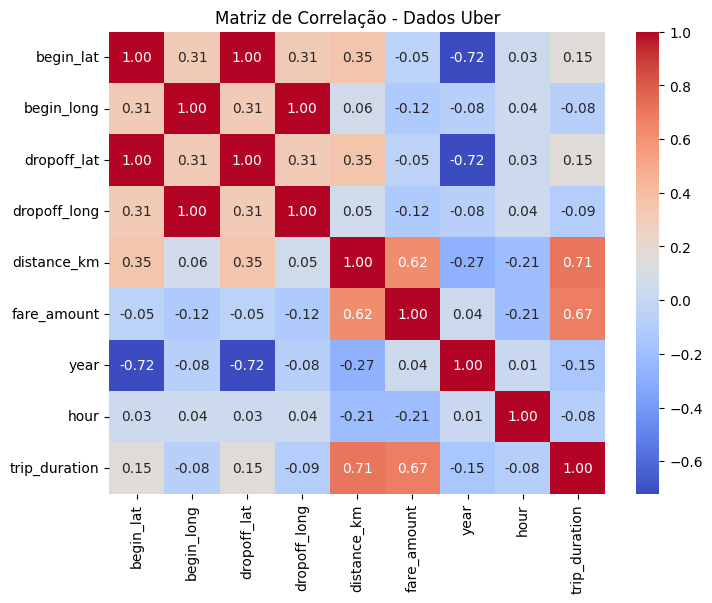

In [20]:
# Calculando a matriz de correlação
correlation_matrix = uber_df.corr(numeric_only=True)

# Criando o mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Dados Uber')
plt.show()

In [21]:
# Selecionando as colunas escolhidas para criar um novo DataFrame
col = ['distance_km', 'fare_amount', 'trip_duration', 'hour']
uber_ml = uber_df[col]

uber_ml

,distance_km,fare_amount,trip_duration,hour
8,1.705900,9.92,17.683333,22
9,1.738087,12.29,13.300000,21
10,4.409592,16.92,14.950000,1
11,3.926790,13.93,15.133333,21
12,8.062793,19.98,13.550000,2
...,...,...,...,...
387,6.968442,21.19,19.050000,23
388,7.370777,15.49,16.416667,11
389,7.274217,13.54,15.866667,12
390,5.101608,10.66,10.050000,11


### **2. Normalização ou padronização**
StandardScaler é uma técnica de pré-processamento comum usada para normalizar e padronizar os dados antes da aplicação de algoritmos de aprendizado de máquina. StandardScaler é usado para padronizar os recursos (features) de um conjunto de dados, transformando-os para que tenham uma média de zero e um desvio padrão de um. Isso é importante porque muitos algoritmos de aprendizado de máquina assumem que os dados estão normalmente distribuídos e têm média zero e variância unitária.

In [22]:
#Redução de dimensionalidade StandardScaler

X = uber_ml.iloc[:,0:7].values
scaler=StandardScaler()
X= scaler.fit_transform(X)


### **3. Aplicação do método de Elbow**
Técnica utilizada quando você não tem um número específico de clusters e deseja encontrar o valor mais apropriado com base na estrutura dos dados, identificando um ponto onde a adição de mais clusters não fornece um ganho significativo na explicação da variância dos dados.

Número de clusters: 1, Inertia: 1272.000000000001
Número de clusters: 2, Inertia: 750.8436844380336
Número de clusters: 3, Inertia: 595.2200072630321
Número de clusters: 4, Inertia: 471.4298644217997
Número de clusters: 5, Inertia: 415.85152716301025
Número de clusters: 6, Inertia: 367.01992072006817
Número de clusters: 7, Inertia: 340.47627742408554
Número de clusters: 8, Inertia: 298.393347039094
Número de clusters: 9, Inertia: 275.1577929640426
Número de clusters: 10, Inertia: 256.1246680029602


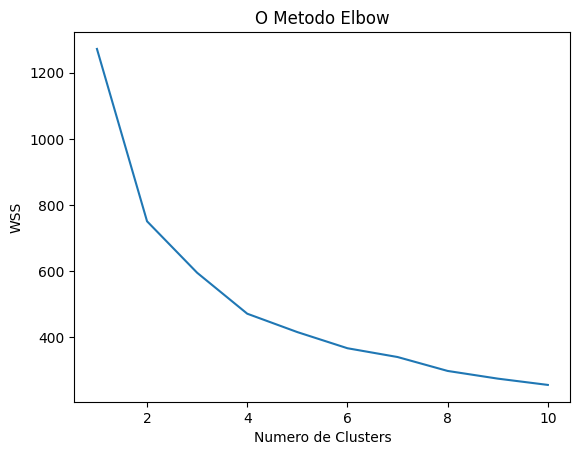

In [23]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=(0), n_init=10)
    kmeans.fit(X)
    print(f"Número de clusters: {i}, Inertia: {kmeans.inertia_}")
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

### **4. Configuração de parâmetros e execução do algortimo KMeans**
O algoritmo K-Means é um dos métodos mais populares de clustering e agrupamento de dados não supervisionados. Ele é utilizado para dividir um conjunto de dados em k grupos (clusters) baseados em características similares, seu funcionamento consiste na:
1. Inicialização dos centróides: O algoritmo começa selecionando aleatoriamente k pontos como centróides iniciais (representantes dos clusters).

2. Atribuição de pontos aos clusters: Para cada ponto de dados, calcula-se a distância entre o ponto e os centróides. O ponto é atribuído ao cluster representado pelo centróide mais próximo.

3. Atualização dos centróides: Uma vez que todos os pontos foram atribuídos aos clusters, os centróides são recalculados como a média de todos os pontos atribuídos a cada cluster.

4. Repetição: Os passos 2 e 3 são repetidos iterativamente até que a atribuição dos pontos aos clusters não mude ou uma condição de parada seja atingida (como um número máximo de iterações).

Com base no resultado obtido pelo método de Elbow escolheu-se o parâmetro K = 4.

In [24]:
# Execução do K-Means, K = 4

kmeans = KMeans(n_clusters=4, random_state = 0, n_init=10)
previsoes = kmeans.fit_predict(X)

### **5. Avaliação dos resultados e Interpretação dos clusters**

*   Índice de silhueta e inércia: Métricas para avaliar a qualidade dos clusters formados pelo algoritmo K-Means
*   Gráfico de Dispersão: Usaremos essa visão para destar cada cluster com diferentes cores ou marcadores para compreender a separação e a sobreposição dos grupos.
*   Perfil dos Clusters: Analise das características médias de cada cluster para entender suas particularidades, realizando a comparação de médias, desvios padrão e distribuições de variáveis em cada cluster.










In [25]:
# Calcular o índice de silhueta
indice_silhueta = silhouette_score(X, previsoes)

# Calcular a inércia
kmeans.fit(X)
inercia = kmeans.inertia_

# Exibir os resultados
print(f"Índice de Silhueta: {indice_silhueta}")
print(f"Inércia: {inercia}")

Índice de Silhueta: 0.3334071024202822
Inércia: 471.4298644217997


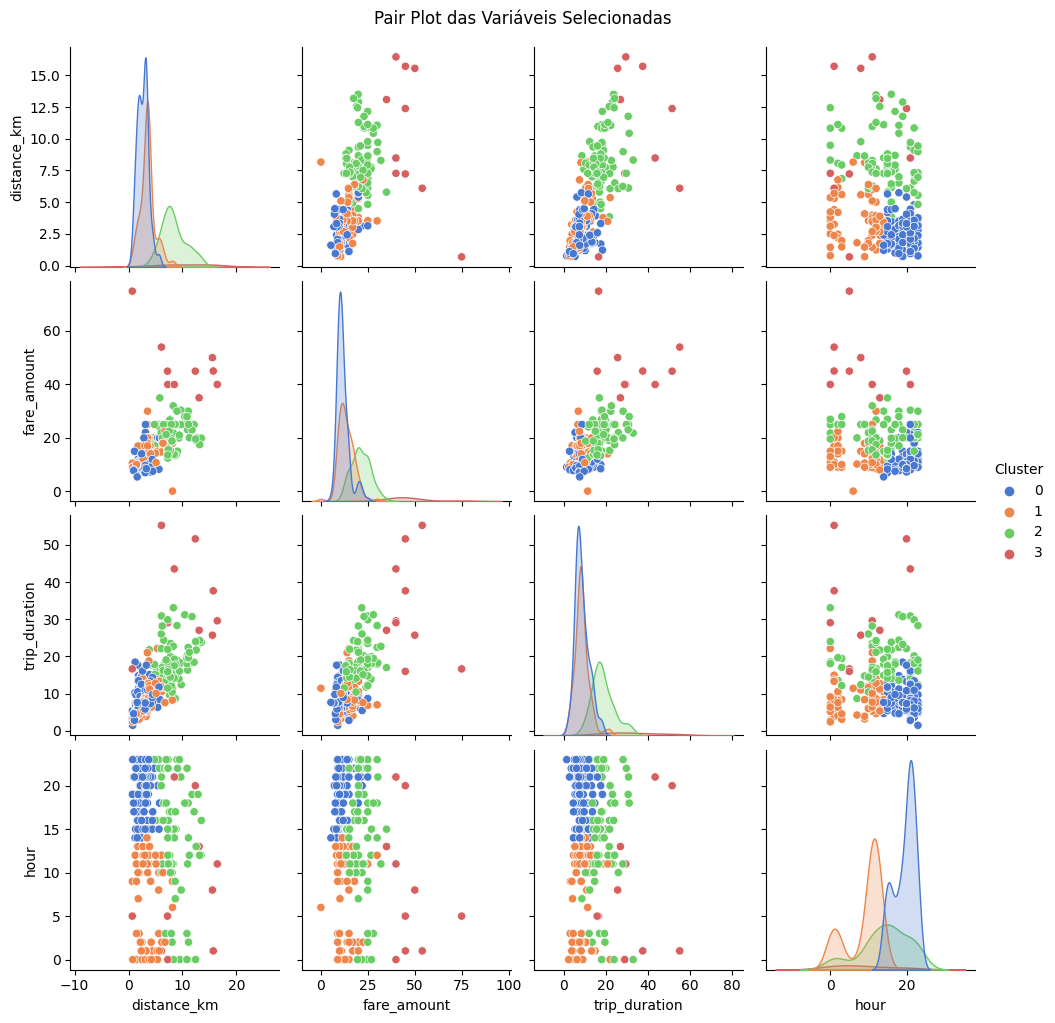

In [26]:
#Grid de gráficos de dispersão para visualizar a relação entre pares de variáveis numéricas

# Adicionar as previsões ao DataFrame
uber_ml['Cluster'] = previsoes

# Criar o grid de gráficos de dispersão
sns.pairplot(uber_ml, hue='Cluster', palette='muted')
plt.suptitle('Pair Plot das Variáveis Selecionadas', y=1.02)
plt.show()

In [27]:
# Calcular a média de cada atributo para cada cluster usando groupby
medias_por_cluster = uber_ml.groupby('Cluster').mean()

# Exibir as médias de cada atributo para cada cluster
print(medias_por_cluster)

         distance_km  fare_amount  trip_duration       hour
Cluster                                                    
0           2.620664    11.502197       8.612247  19.462121
1           3.524292    13.442626       8.604040   8.989899
2           8.324677    21.245844      18.652381  14.324675
3          10.293339    46.842000      33.210000   8.500000


### **6. Resultados**

A partir do Índice de Silhueta de 0.33, conslui-se que há uma sobreposição entre os clusters, o que também é evidenciado nos gráficos de dispersão. Esta sobreposição é esperada devido à natureza dos dados, sendo obtido clusters significativos para o melhor valor de inércia, 471.4, o que nos leva a concluir que este é um modelo aceitável para a análise realizada.

Por fim, concluindo que foi desenvolvido um bom modelo, a análise das características de cada cluster nos permite categorizá-los da seguinte forma:

*   **Cluster 0 - Perfil Crepúsculo**: Corridas rápidas de baixa tarifa, ocorridas ao entardecer ou à noite.
*   **Cluster 1 - Perfil Diurno**: Viagens entre a manhã e a tarde, de curta distância e com tarifas de baixo custo.
*   **Cluster 2 - Pefil Viajante**: Corridas que podem ocorrer a qualquer horário do dia, com duração superior a 15 minutos e ultrapassando os 5 km de distância até o destino.
*   **Cluster 3 - Perfil Alta tarifa**: São viagens que, independentemente do horário ou da distância percorrida, possuem tarifas mais altas, geralmente associadas às flutuações nos preços das corridas devido à dinâmica do aplicativo.